<a href="https://colab.research.google.com/github/M-Isaiah/Machine_L_R/blob/main/BOD_DATA_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from google.colab import files 
import io
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [2]:
bod=pd.read_csv('/content/gdrive/MyDrive/Machine Learning/bod.csv')

In [3]:
bod.head()

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


In [4]:
bod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATION CODE         534 non-null    int64  
 1   LOCATIONS            534 non-null    object 
 2   STATE                534 non-null    object 
 3   TEMP                 529 non-null    float64
 4   DO                   532 non-null    float64
 5   pH                   534 non-null    float64
 6   CONDUCTIVITY         504 non-null    float64
 7   BOD                  528 non-null    float64
 8   NITRATE_N_NITRITE_N  532 non-null    float64
 9   FECAL_COLIFORM       452 non-null    float64
 10  TOTAL_COLIFORM       495 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 46.0+ KB


From the above information, it is apparent that a few data is missing

In [5]:
#In this section, we drop off the columns which are not of interest and generate a new data frame: bod1
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='constant')
bod1=pd.DataFrame(imputer.fit_transform(bod),columns=bod.columns)
bod1.drop(['STATION CODE','LOCATIONS','STATE'],axis=1,inplace=True)

In [6]:
bod1

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,29.2,6.4,8.1,735.0,3.4,2.0,3.0,73.0
1,24.5,6.0,8.0,270.0,3.1,2.0,72.0,182.0
2,25.8,5.5,7.8,355.0,4.2,9.0,59.0,133.0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.0,5.0,14.0
530,22.9,5.6,8.4,591.0,1.1,3.0,4.0,8.0
531,22.9,5.8,8.5,588.0,1.2,3.0,4.0,6.0
532,28.7,4.1,7.9,1133.0,2.3,2.0,7.0,67.0


In [7]:
#In this section, for purposes of analysis, we drop replace all the missing values with 0
bod1['TEMP'].replace('missing_value',0,inplace=True)
bod1['DO'].replace('missing_value',0,inplace=True)
bod1['pH'].replace('missing_value',0,inplace=True)
bod1['CONDUCTIVITY'].replace('missing_value',0,inplace=True)
bod1['BOD'].replace('missing_value',0,inplace=True)
bod1['NITRATE_N_NITRITE_N'].replace('missing_value',0,inplace=True)
bod1['FECAL_COLIFORM'].replace('missing_value',0,inplace=True)
bod1['TOTAL_COLIFORM'].replace('missing_value',0,inplace=True)

In [8]:
bod1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TEMP                 534 non-null    float64
 1   DO                   534 non-null    float64
 2   pH                   534 non-null    object 
 3   CONDUCTIVITY         534 non-null    float64
 4   BOD                  534 non-null    float64
 5   NITRATE_N_NITRITE_N  534 non-null    float64
 6   FECAL_COLIFORM       534 non-null    float64
 7   TOTAL_COLIFORM       534 non-null    float64
dtypes: float64(7), object(1)
memory usage: 33.5+ KB


In the above information therefore, the dataset is complete, with all the missing values filled with a '0' value

In [9]:
#In this section, we scale down all the values in all the columns to range from 0 to 1, for purpose of TSNE plot in the next section
column_names=['TEMP','DO','pH','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']
data_values=bod1[column_names]
data_values_n=(data_values-data_values.min())/(data_values.max()-data_values.min())

In [10]:
data_values_n

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,0.863905,0.392638,0.214286,0.030546,0.044974,0.043956,0.00001,0.000003
1,0.724852,0.368098,0.202381,0.011221,0.041005,0.043956,0.000232,0.000008
2,0.763314,0.337423,0.178571,0.014754,0.055556,0.197802,0.00019,0.000006
3,0.733728,0.337423,0.178571,0.015419,0.074074,0.078022,0.00029,0.000012
4,0.760355,0.349693,0.190476,0.012218,0.042328,0.059121,0.000145,0.000006
...,...,...,...,...,...,...,...,...
529,0.686391,0.269939,0.214286,0.022359,0.015873,0.021978,0.000016,0.000001
530,0.677515,0.343558,0.25,0.024562,0.01455,0.065934,0.000013,0.0
531,0.677515,0.355828,0.261905,0.024437,0.015873,0.065934,0.000013,0.0
532,0.849112,0.251534,0.190476,0.047087,0.030423,0.043956,0.000023,0.000003


In [11]:
#iN THIS SECTION, WE CARRY OUT TSNE OPERATION, BY FITTING THE DATA VALUES ABOVE INTO TSNE MODEL, 2D MODEL
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, random_state=0)
x_bod_2d=tsne.fit_transform(data_values_n)
#We also add this generate set to new columns , named x and y in the bod1 data set
bod1['x']=x_bod_2d[:,0]
bod1['y']=x_bod_2d[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [12]:
#This is the 2D data values which can now be ploted on a TSNE plot
x_bod_2d

array([[  8.6755705 ,  14.087617  ],
       [ -4.3335676 ,   0.55600464],
       [ 23.68495   ,   7.1752853 ],
       ...,
       [ -3.1049764 ,  -4.2947526 ],
       [  4.1483536 ,  18.94538   ],
       [-11.274354  ,  -0.29576048]], dtype=float32)

In [13]:
#bod1 now has new look as below, with all the data projected to the x and y by tsne function as shown. 
bod1

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,x,y
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0,8.675570,14.087617
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0,-4.333568,0.556005
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0,23.684950,7.175285
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0,-4.722024,2.880276
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0,-3.416636,2.540570
...,...,...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0,-1.274997,-3.169045
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0,-2.870630,-4.298819
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0,-3.104976,-4.294753
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0,4.148354,18.945379


In [14]:
# Determination of the number of clusters on which the data can be claustered. This has been done by Kmeans function through iteration 10 times
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(bod1[['TEMP','pH','DO','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']])
    sse.append(km.inertia_)
    

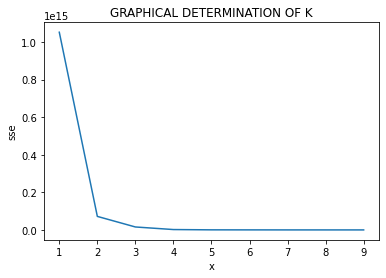

In [15]:
#Plot for the determination of the K, the number of clusters
plt.xlabel('x')
plt.ylabel('sse')
plt.plot(k_rng,sse)
plt.title('GRAPHICAL DETERMINATION OF K');

From the graph, it is clear that the data can be appropriately clustered into two groups as th value of k=2

In [16]:
#Clustering of the actual data
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(bod1[['TEMP','pH','DO','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']])
bod1['Cluster']=y_predicted

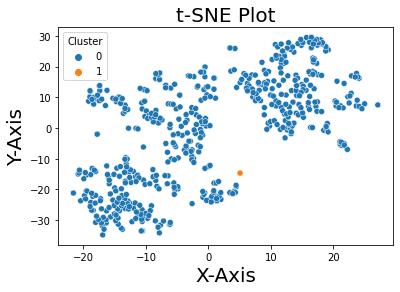

In [17]:
# Ploting TSNE PLOT
sns.scatterplot(x='x',y='y', hue='Cluster',data=bod1);
sns.set_style("darkgrid");
plt.xlabel("X-Axis",fontsize=20);
plt.ylabel("Y-Axis",fontsize=20);
plt.title("t-SNE Plot", fontsize=20);

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

**DETERMINATION OF THE PERSON CORRELATION**



**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

In [18]:
#In this section, we determine the Perason Correlation, to inform us on whether there are associations between the sets of the data in relation to BOD
correlation = bod1.corr()

In [19]:
print(correlation.loc['TEMP','BOD'])

-0.12337583148016162


In [20]:
print(correlation.loc['DO','BOD'])

-0.5995523452065415


In [21]:
print(correlation.loc['CONDUCTIVITY','BOD'])

0.08997704150264683


In [22]:
print(correlation.loc['NITRATE_N_NITRITE_N','BOD'])

0.27952727058925303


In [23]:
print(correlation.loc['FECAL_COLIFORM','BOD'])

0.286619935022133


In [24]:
print(correlation.loc['TOTAL_COLIFORM','BOD'])

0.17091773866366414


In [25]:
parameters={'Temp':-0.12,'DO':-0.60,'Conductivity':0.09,'Nitrate_N_Nitrite':0.28,'F. Coliforms':0.29,'T.Coliforms':0.17}
remarks={'Temp':"Small Negative",'DO':"High Negative",'Conductivity':"Small Posivtive",'Nitrate_N_Nitrite':"Medium Positive",'F. Coliforms':"Medium Positive",'T.Coliforms':"Small Positive"}

In [26]:
pearson_corr=pd.DataFrame({'Parameters':parameters,'Corr_Strength':remarks})

In [27]:
#Pearon Corrrelation with respect to BOD[Biochemical Oxygen Demand]
pearson_corr.T

,Temp,DO,Conductivity,Nitrate_N_Nitrite,F. Coliforms,T.Coliforms
Parameters,-0.12,-0.6,0.09,0.28,0.29,0.17
Corr_Strength,Small Negative,High Negative,Small Posivtive,Medium Positive,Medium Positive,Small Positive


***There was a challenge with running the correlation for pH, the error persisted on troubleshooting**

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**%

**PRINCIPAL COMPONENT  ANALYSIS-PCA**


**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**


In [28]:
bod1

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,x,y,Cluster
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0,8.675570,14.087617,0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0,-4.333568,0.556005,0
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0,23.684950,7.175285,0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0,-4.722024,2.880276,0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0,-3.416636,2.540570,0
...,...,...,...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0,-1.274997,-3.169045,0
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0,-2.870630,-4.298819,0
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0,-3.104976,-4.294753,0
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0,4.148354,18.945379,0


In [29]:
#Dropping the clolumns in bod1 for reuse in PCA analysis
bod1.drop(['x','y','Cluster'],axis=1,inplace=True)
bod2=bod1

In [30]:
bod2

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(bod2)
StandardScaler(copy=True,with_mean=True, with_std=True)
scaled_data=scaler.transform(bod2)


In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [33]:
#Re-Clustering of bod2
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(bod1[['TEMP','pH','DO','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']])
bod2['Cluster']=y_predicted

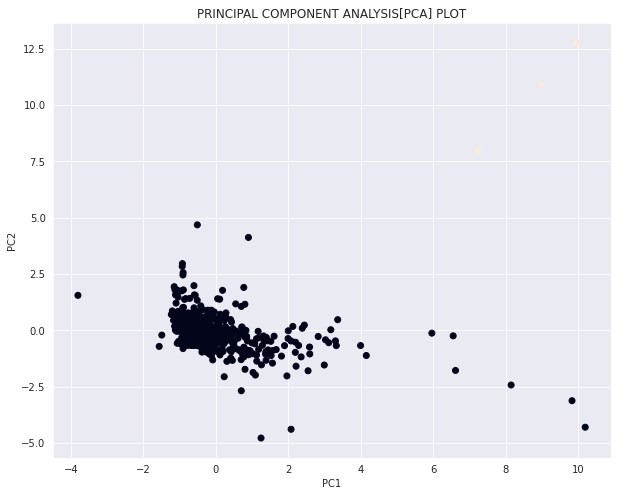

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=bod2['Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PRINCIPAL COMPONENT ANALYSIS[PCA] PLOT');